In [13]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, f1_score

from scipy.optimize import minimize_scalar

In [128]:
%matplotlib inline

In [54]:
mse_outputs = pd.read_csv("MSE_Output_to_find_cutoff.csv")

In [55]:
mse_outputs.head()

,value
0,0.878673
1,0.181620
2,0.219009
3,0.611346
4,0.252469


In [56]:
Y3 = pd.read_csv("What_Sean_calls_Y3.csv")

In [57]:
Y3.head()

,X1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [58]:
Y3['X1'] = (Y3['X1']).astype('int')
Y3['X1'].sum()

119

In [7]:
prec, rec, thres = precision_recall_curve(Y3, mse_outputs)
score = np.zeros(len(thres))

# Score Thresholds
for i in range(0,len(thres)):
    score[i] = f1_score(Y3, (mse_outputs > thres[i]).astype('int'))
t = thres[np.argmax(score)]

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
thres[-100:-1]

array([   6.76477647,    6.79997383,    7.00738309,    7.07401852,
          7.07771753,    7.19019417,    7.23754415,    7.31534705,
          7.32490089,    7.38291878,    7.41621835,    7.42228511,
          7.43287849,    7.4768157 ,    7.48533355,    7.50233256,
          7.52153483,    7.56715335,    7.62430486,    7.7646376 ,
          7.98583091,    8.22363498,    8.28293822,    8.32694741,
          8.36757864,    8.44078034,    8.71531038,    8.82867808,
          8.90905163,    8.95854995,    9.14876127,    9.3910084 ,
          9.46552602,    9.94758895,   10.03031345,   10.03288616,
         10.39749531,   10.49510059,   10.56414005,   10.79332192,
         10.98003437,   11.24021015,   11.46992705,   11.47032864,
         11.63189113,   11.70064191,   11.81440792,   11.82031237,
         11.95785599,   12.01970467,   12.2019649 ,   12.34896439,
         12.61901576,   13.11989846,   13.67717344,   13.93813169,
         13.9978874 ,   14.64390214,   15.29721547,   15.33753

In [9]:
f1_score(Y3, (mse_outputs > t).astype('int'))

0.033333333333333333

In [10]:
t

2.6255574753683319

In [11]:
((mse_outputs > t).astype('int').values.T[0] & Y3['X1'].values).sum()

8

In [12]:
f1_score(Y3, (mse_outputs > 19.9527736 ).astype('int'))

0.0

In [13]:
score[-20:-1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
mse_outputs.shape

(26099, 1)

In [15]:
thres.shape

(25506,)

In [16]:
%matplotlib inline

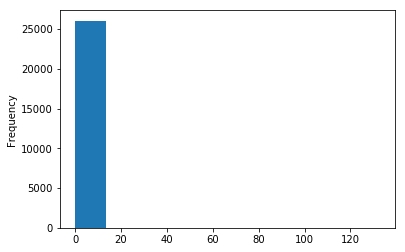

In [17]:
mse_outputs['value'].plot.hist();

In [18]:
thres_as_pandas_object = pd.Series(thres)

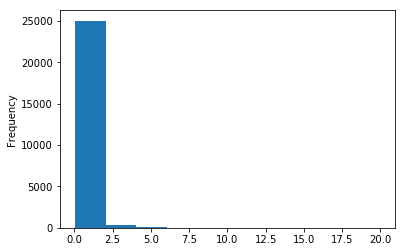

In [19]:
thres_as_pandas_object[thres_as_pandas_object < 20].plot.hist();

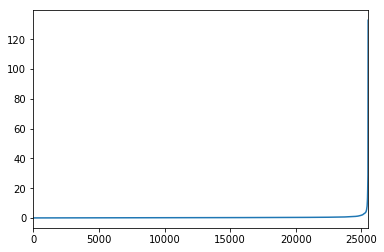

In [20]:
thres_as_pandas_object.plot.line();

In [21]:
scores_as_pandas_object = pd.Series(thres)

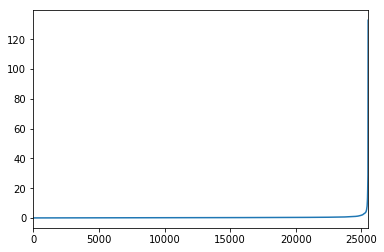

In [22]:
scores_as_pandas_object.plot.line();

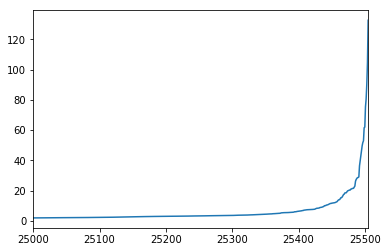

In [23]:
scores_as_pandas_object[25000:].plot.line();

In [2]:
import keras

Using TensorFlow backend.


In [9]:
ES = keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 10**(-5), patience = 2)

def get_model_object(number_of_hidden_nodes, Z12_x):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(number_of_hidden_nodes, input_shape = (65,), activation = 'tanh'))
    model.add(keras.layers.Dense(65, activation = 'linear'))
    model.compile(optimizer = 'sgd', loss = 'mse')
    model.fit(Z12_x, Z12_x, callbacks = [ES], validation_split = 0.1, epochs = 250, verbose = 0)
    return model

In [10]:
Z12_x = pd.read_csv("Z12_x_39.csv").values

In [11]:
sample_model = get_model_object(10, Z12_x)

In [12]:
sample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                660       
_________________________________________________________________
dense_4 (Dense)              (None, 65)                715       
Total params: 1,375.0
Trainable params: 1,375
Non-trainable params: 0.0
_________________________________________________________________


In [14]:
def get_training_week_data_filename_QD(week_number, simulated_org_number):
    head_folder_name = "C:/Users/Mimran/OneDrive - George Mason University/C4I PC Backup/SCITE/RCPs Fifth Quarter/RCP13/Dev/July 12 PopSyn"
    full_filename = "{}/{}/org ({}).csv".format(head_folder_name, 
                                                     week_number, 
                                                     simulated_org_number)
    return full_filename

In [16]:
from pathlib import Path
for week_number in range(5, 34):
    print("can find week {}:{}".format(week_number, 
                                       Path(get_training_week_data_filename_QD(week_number, 9)).exists()))

can find week 5:True
can find week 6:True
can find week 7:True
can find week 8:True
can find week 9:True
can find week 10:True
can find week 11:True
can find week 12:True
can find week 13:True
can find week 14:True
can find week 15:True
can find week 16:True
can find week 17:True
can find week 18:True
can find week 19:True
can find week 20:True
can find week 21:True
can find week 22:True
can find week 23:True
can find week 24:True
can find week 25:True
can find week 26:True
can find week 27:True
can find week 28:True
can find week 29:True
can find week 30:True
can find week 31:True
can find week 32:True
can find week 33:True


In [17]:
def read_training_week_data_QD(week_number, simulated_org_number):
    full_filename = get_training_week_data_filename_QD(week_number, simulated_org_number)
    week_df = pd.read_csv(full_filename) # Note this assumes similar order of users everywhere
    week_df.replace([-np.inf,np.inf], np.nan, inplace=True) #(no matching of users is necessary *under this assumption*)
    return week_df.dropna()

In [18]:
detector_names = read_training_week_data_QD(30, 5).columns.values.tolist()

In [19]:
detector_names

['Target',
 'X001a',
 'X001b',
 'X001c',
 'X014a',
 'X015a',
 'X021a',
 'X021d',
 'X021e',
 'X021f',
 'X021g',
 'X021h',
 'X021i',
 'X021j',
 'X022a',
 'X022d',
 'X022e',
 'X022f',
 'X022g',
 'X022h',
 'X022i',
 'X022j',
 'X027a',
 'X027d',
 'X027e',
 'X027f',
 'X027g',
 'X027h',
 'X027i',
 'X027j',
 'X028a',
 'X028d',
 'X028e',
 'X028f',
 'X028g',
 'X028h',
 'X028i',
 'X028j',
 'X029a',
 'X030a',
 'X031a',
 'X032a',
 'X033a',
 'X034a',
 'X035a',
 'X036a',
 'X037a',
 'X038a',
 'X039a',
 'X040a',
 'X041a',
 'X042a',
 'X043a',
 'X044a',
 'X045a',
 'X046a',
 'X047a',
 'X048a',
 'X049a',
 'X050a',
 'X051a',
 'X052a',
 'X053a',
 'X058a',
 'X059a',
 'X060a']

In [20]:
read_training_week_data_QD(30, 5).head()

,Target,X001a,X001b,X001c,X014a,X015a,X021a,X021d,X021e,X021f,...,X047a,X048a,X049a,X050a,X051a,X052a,X053a,X058a,X059a,X060a
0,0,4043,3636,4125,0.004538,0.731251,47,4,0,2,...,0.588701,0.758955,0.402283,0.361672,0.548177,0.346602,3,0,0,0
1,0,19342,301,1628,0.586515,0.748149,57,24,0,2,...,0.502830,0.822143,0.010450,0.008316,0.009232,0.010916,2,0,0,10
2,0,17932,1214,1598,0.013007,0.840910,109,29,0,6,...,0.559236,0.828880,0.020486,0.364350,0.016851,0.014695,2,0,0,45
3,0,0,1195,3759,0.013572,0.911262,33,8,26,0,...,0.346418,0.698512,0.012066,0.013116,0.014495,0.011558,2,0,0,32
4,0,17403,2550,8386,0.008223,0.984957,269,36,31,51,...,0.635171,0.856378,0.006862,0.007443,0.005871,0.005006,1,0,0,29


In [21]:
np.random.seed(6122017)

In [24]:
def read_training_org_data(simulated_org_number, first_full_week, last_full_week):
    all_full_week_dfs = [read_training_week_data_QD(week_number, simulated_org_number) for week_number in range(first_full_week, last_full_week + 1)]
    return pd.concat(all_full_week_dfs).dropna()

In [25]:
def split_training_data(sample_training_data_df):
    Ones_x = sample_training_data_df[sample_training_data_df['Target'] == 1].drop('Target', 1)
    Ones_y = sample_training_data_df[sample_training_data_df['Target'] == 1]['Target']
    Zeros = sample_training_data_df[sample_training_data_df['Target'] == 0]
    Z12_x, Z3_x, Z12_y, Z3_y = train_test_split(Zeros.drop('Target', 1), Zeros['Target'],
                                                test_size = 0.3)
    #print(Ones_x.shape)
    scaler = StandardScaler().fit(Z12_x)
    Ones_x = scaler.transform(Ones_x)
    Z12_x = scaler.transform(Z12_x)
    Z3_x = scaler.transform(Z3_x)
    return Z12_x, Z3_x, Z12_y.values, Z3_y.values, Ones_x, Ones_y.values, scaler

In [27]:
some_df = read_training_org_data(15, 5, 33)
X_train, X_test, y_train, y_test = train_test_split(some_df.drop('Target', 1), some_df['Target'],
                                                test_size = 0.3)
X_train.shape

(62869, 65)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [32]:
smartClassifier = RandomForestClassifier()
smartClassifier.fit(X_train, y_train)
y_pred = smartClassifier.predict(X_test)
precision_score(y_pred = y_pred, y_true=y_test)

1.0

In [35]:
recall_score(y_pred = y_pred, y_true=y_test)

0.09375

In [38]:
confusion_matrix(y_pred = y_pred, y_true=y_test)

array([[26912,     0],
       [   29,     3]])

In [39]:
Z12_x, Z3_x, Z12_y, Z3_y, Ones_x, Ones_y, some_scaler = split_training_data(some_df)

In [40]:
some_df['Target'].mean()

0.0013249752263035418

In [41]:
def get_testing_week_data_filename_QD(week_number, simulated_org_number):
    head_folder_name = "C:/Users/Mimran/OneDrive - George Mason University/C4I PC Backup/SCITE/RCPs Fifth Quarter/RCP13/Dev/July 12 PopSyn"
    full_filename = "{}/{}/org ({}).csv".format(head_folder_name, 
                                                     week_number, 
                                                     simulated_org_number)
    return full_filename

In [48]:
def read_testing_week_data_QD(week_number, simulated_org_number):
    full_filename = get_testing_week_data_filename_QD(week_number, simulated_org_number)
    week_df = pd.read_csv(full_filename, usecols = list(range(1,67))) # Note this assumes similar order of users everywhere
    week_df.replace([-np.inf,np.inf], np.nan, inplace=True) #(no matching of users is necessary *under this assumption*)
    return week_df.dropna()

In [49]:
def read_org_test_data(simulated_org_number, first_week, last_week):
    all_full_week_dfs = []
    for current_week in range(first_week, last_week + 1):
        current_week_df = read_testing_week_data_QD(current_week, simulated_org_number)
        detector_string = 'X021f'
        current_week_df['trait_4'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
        detector_string = 'X021h'
        current_week_df['trait_6'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
        detector_string = 'X022f'
        current_week_df['trait_8'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
        detector_string = 'X022h'
        current_week_df['trait_10'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
        detector_string = 'X027f'
        current_week_df['trait_12'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
        detector_string = 'X027h'
        current_week_df['trait_14'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
        detector_string = 'X028f'
        current_week_df['trait_16'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
        detector_string = 'X028h'
        current_week_df['trait_18'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
        detector_string = 'X058a'
        current_week_df['trait_20'] = (current_week_df['{}'.format(detector_string)])
        all_full_week_dfs.append(current_week_df)
    return pd.concat(all_full_week_dfs)

In [50]:
all_trait_names = ["trait_" + str(trait_num) for trait_num in range(4, 21, 2)]

In [51]:
def split_test_data(sample_test_data_df, scaler_from_training_data):
    T_x, T_y, T_generated_attributes = (sample_test_data_df[detector_names[1:]], 
                                        sample_test_data_df['Target'], 
                                        sample_test_data_df[all_trait_names])
    T_x = scaler_from_training_data.transform(T_x)
    return T_x, T_y.values, T_generated_attributes

In [52]:
some_test_df = read_org_test_data(9, 34, 49)

In [53]:
some_test_df.head()

,Target,X001a,X001b,X001c,X014a,X015a,X021a,X021d,X021e,X021f,...,X060a,trait_4,trait_6,trait_8,trait_10,trait_12,trait_14,trait_16,trait_18,trait_20
0,0,13698,7626,16823,0.012016,0.623477,31,14,0,0,...,56,False,False,False,False,False,False,False,False,0
1,0,5803,4543,3226,0.014421,0.775245,27,10,0,0,...,10,False,False,False,False,False,False,False,False,0
2,0,9205,824,220,0.216370,0.696642,12,18,0,0,...,0,False,False,False,False,False,False,False,False,0
3,0,31324,18245,30738,0.004141,0.984465,3,8,0,1,...,2,False,False,False,False,False,False,False,False,0
4,0,16210,3972,19559,0.008758,0.770928,26,17,0,2,...,16,False,False,False,False,False,False,False,False,0


In [82]:
def find_threshold(true_y_values, mse_results):
    prec, rec, thres = precision_recall_curve(true_y_values, mse_results)
    score = np.zeros(len(thres))

    # Score Thresholds
    for i in range(0,len(thres)):
        score[i] = f1_score(true_y_values, (mse_results > thres[i]).astype('int'))
    return thres[np.argmax(score)], score.max()

In [62]:
def get_mse_column_vector(true_x_values, predicted_x_values):
    return ((true_x_values - predicted_x_values) ** 2).mean(axis = 1)

In [69]:
dict_of_training_org_dataframes = {}
dict_of_testing_org_dataframes = {}
for org_number in range(1, 11):
    dict_of_training_org_dataframes[org_number] = read_training_org_data(org_number, 5, 33)
for org_number in range(1, 21):
    some_test_df = read_org_test_data(org_number, 34, 49)
    number_of_ones = some_test_df['Target'].sum()
    dict_of_testing_org_dataframes[org_number] = some_test_df

In [68]:
for org_number in range(1, 21):
    some_test_df = read_org_test_data(org_number, 34, 49)
    number_of_ones = some_test_df['Target'].sum()
    print("{} \t {}".format(org_number, number_of_ones))

1 	 43
2 	 33
3 	 45
4 	 42
5 	 46
6 	 40
7 	 38
8 	 41
9 	 43
10 	 37
11 	 52
12 	 47
13 	 46
14 	 36
15 	 45
16 	 63
17 	 44
18 	 42
19 	 51
20 	 42


In [67]:
list(dict_of_testing_org_dataframes.keys())

[16, 19, 3, 5, 11, 12, 13, 15]

In [66]:
def print_range(some_vector, additional_message):
    print("The min here ({}) is {} and the max here is {}.".format(additional_message, some_vector.min(), some_vector.max()))

In [87]:
all_answer_dicts = {}
for training_org_number in dict_of_training_org_dataframes.keys():
    some_df = dict_of_training_org_dataframes[training_org_number]
    Z12_x, Z3_x, Z12_y, Z3_y, Ones_x, Ones_y, some_scaler = split_training_data(some_df)
    neural_net_model = get_model_object(number_of_hidden_nodes=10, Z12_x=Z12_x)
    data_to_predict = np.vstack([Z3_x, Ones_x])
    predicted_data = neural_net_model.predict(data_to_predict)
    mse_values = get_mse_column_vector(data_to_predict, predicted_data)
    print_range(mse_values, "mse values for training data in org {}".format(training_org_number))
    chosen_tau, best_score = find_threshold(np.hstack([Z3_y, Ones_y]), mse_values)
    print("The cutoff value found for training org number {} is {}.".format(training_org_number, chosen_tau))
    print("The F1 score for this choice is {}.".format(best_score))
    for testing_org_number in dict_of_testing_org_dataframes.keys():
        some_testing_df = dict_of_testing_org_dataframes[testing_org_number]
        T_x, T_y, T_generated_attributes = split_test_data(some_testing_df, some_scaler)
        pred_for_test_data = neural_net_model.predict(T_x)
        mse_for_test_data = get_mse_column_vector(T_x, pred_for_test_data)
        print_range(mse_for_test_data, "mse values for testing data in org {}".format(testing_org_number))
        T_labels = (mse_for_test_data > chosen_tau).astype(int)
        print("The number of alerts in the test data is {}.".format(T_labels.sum()))
        answer_dict = {}
        answer_dict["Answer_1"] = (T_y & T_labels).sum() / T_y.sum()
        answer_dict["Answer_2"] = (T_y & T_labels).sum() / T_labels.sum()
        answer_dict["Answer_3"] = (T_y & T_labels).sum() / (T_y ^ 1).sum()
        answer_dict["Answer_4"] = (T_generated_attributes['trait_4'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_5"] = (T_generated_attributes['trait_4'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_4'])
        answer_dict["Answer_6"] = (T_generated_attributes['trait_6'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_7"] = (T_generated_attributes['trait_6'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_6'])
        answer_dict["Answer_8"] = (T_generated_attributes['trait_8'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_9"] = (T_generated_attributes['trait_8'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_8'])
        answer_dict["Answer_10"] = (T_generated_attributes['trait_10'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_11"] = (T_generated_attributes['trait_10'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_10'])
        answer_dict["Answer_12"] = (T_generated_attributes['trait_12'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_13"] = (T_generated_attributes['trait_12'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_12'])
        answer_dict["Answer_14"] = (T_generated_attributes['trait_14'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_15"] = (T_generated_attributes['trait_14'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_14'])
        answer_dict["Answer_16"] = (T_generated_attributes['trait_16'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_17"] = (T_generated_attributes['trait_16'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_16'])
        answer_dict["Answer_18"] = (T_generated_attributes['trait_18'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_19"] = (T_generated_attributes['trait_18'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_18'])
        answer_dict["Answer_20"] = (T_generated_attributes['trait_20'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_21"] = (T_generated_attributes['trait_20'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_20'])
        all_answer_dicts[(training_org_number, testing_org_number)] = answer_dict

The min here (mse values for training data in org) is 0.023844878447427477 and the max here is 259.03636975942254.


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


The cutoff value found for training org number 1 is 4.036197055391537.
The F1 score for this choice is 0.06741573033707865.
The min here (mse values for testing data in org) is 0.023844878447427477 and the max here is 259.03636975942254.
The number of alerts in the test data is 642.
The min here (mse values for testing data in org) is 0.023844878447427477 and the max here is 259.03636975942254.
The number of alerts in the test data is 602.
The min here (mse values for testing data in org) is 0.023844878447427477 and the max here is 259.03636975942254.
The number of alerts in the test data is 585.
The min here (mse values for testing data in org) is 0.023844878447427477 and the max here is 259.03636975942254.
The number of alerts in the test data is 621.
The min here (mse values for testing data in org) is 0.023844878447427477 and the max here is 259.03636975942254.
The number of alerts in the test data is 581.
The min here (mse values for testing data in org) is 0.023844878447427477 an

In [88]:
all_answer_dicts

{(1, 1): {'Answer_1': 0.0,
  'Answer_10': 0.20249221183800623,
  'Answer_11': 0.022313765877102643,
  'Answer_12': 0.21495327102803738,
  'Answer_13': 0.02770528006424413,
  'Answer_14': 0.2102803738317757,
  'Answer_15': 0.024,
  'Answer_16': 0.19158878504672897,
  'Answer_17': 0.025334706488156541,
  'Answer_18': 0.2087227414330218,
  'Answer_19': 0.0240057327122895,
  'Answer_2': 0.0,
  'Answer_20': 0.43457943925233644,
  'Answer_21': 0.51762523191094612,
  'Answer_3': 0.0,
  'Answer_4': 0.22118380062305296,
  'Answer_5': 0.024912280701754386,
  'Answer_6': 0.22585669781931464,
  'Answer_7': 0.024799042243885756,
  'Answer_8': 0.19781931464174454,
  'Answer_9': 0.022210563133962923},
 (1, 2): {'Answer_1': 0.18181818181818182,
  'Answer_10': 0.2441860465116279,
  'Answer_11': 0.025292498279421885,
  'Answer_12': 0.21262458471760798,
  'Answer_13': 0.025528520143597924,
  'Answer_14': 0.22093023255813954,
  'Answer_15': 0.023378449639655477,
  'Answer_16': 0.21760797342192692,
  'Answ

In [91]:
writer = pd.ExcelWriter('Tonight_Answers.xlsx')
pd.DataFrame(all_answer_dicts).to_excel(writer, 'MainSheet')
writer.save()

In [98]:
df_of_answers = pd.DataFrame(all_answer_dicts).T.reset_index().rename(index = str, columns = {'level_0' : 'training_org', 'level_1' : 'testing_org'})

In [100]:
df_of_answers.to_csv("July12Answers.csv", index=False)

In [104]:
def get_training_data_Vermillion(simulated_org_number):
    head_folder_name = "C:/Users/Mimran/OneDrive - George Mason University/C4I PC Backup/SCITE/RCPs Fifth Quarter/RCP13/Dev/Vermillion_data"
    full_filename = "{}/Vermillion_generated_training_data_{}.csv".format(head_folder_name, simulated_org_number)
    return full_filename

In [110]:
def read_training_org_data_Vermillion(simulated_org_number):
    return pd.read_csv(get_training_data_Vermillion(simulated_org_number), usecols = list(range(1, 67)))

In [111]:
org0_V = read_training_org_data_Vermillion(0)

In [120]:
org0_V.tail()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,Target
89808,29252.0,17559.0,3570.0,0.038539,0.748742,11.0,7.0,0.0,0.0,8.0,...,0.751408,0.049111,0.050598,0.051542,0.052765,0.0,0.0,0.0,2.940146,1.0
89809,10444.0,536.0,777.0,0.028698,0.881148,66.0,8.0,0.0,9.0,18.0,...,0.643742,0.008410,0.006691,0.009152,0.010161,0.0,0.0,0.0,18.203107,1.0
89810,4047.0,1194.0,408.0,0.034917,0.736856,51.0,9.0,1.0,26.0,10.0,...,0.742439,0.008851,0.008632,0.010498,0.008393,0.0,0.0,0.0,33.350870,1.0
89811,25392.0,1898.0,429.0,0.033037,0.895226,4.0,0.0,0.0,0.0,8.0,...,0.792112,0.044050,0.044706,0.048979,0.046531,0.0,1.0,1.0,38.583351,1.0
89812,7067.0,2985.0,1595.0,0.014287,0.900035,46.0,9.0,0.0,4.0,40.0,...,0.695492,0.033830,0.029959,0.033203,0.035629,0.0,0.0,0.0,27.601016,1.0


In [114]:
Z12_x, Z3_x, Z12_y, Z3_y, Ones_x, Ones_y, some_scaler = split_training_data(org0_V)

In [117]:
list(range(0, 1))

[0]

In [118]:
def get_testing_data_Vermillion(simulated_org_tuple):
    head_folder_name = "C:/Users/Mimran/OneDrive - George Mason University/C4I PC Backup/SCITE/RCPs Fifth Quarter/RCP13/Dev/Vermillion_data"
    full_filename = "{}/Vermillion_generated_testing_data_({}, {}).csv".format(head_folder_name, simulated_org_tuple[0], simulated_org_tuple[1])
    return full_filename

In [189]:
def read_org_test_data_Vermillion(simulated_org_tuple):
    all_weeks_df = pd.read_csv(get_testing_data_Vermillion(simulated_org_tuple), index_col = 0)
    all_weeks_df['trait_4'] = -1
    all_weeks_df['trait_6'] = -1
    all_weeks_df['trait_8'] = -1
    all_weeks_df['trait_10'] = -1
    all_weeks_df['trait_12'] = -1
    all_weeks_df['trait_14'] = -1
    all_weeks_df['trait_16'] = -1
    all_weeks_df['trait_18'] = -1
    all_weeks_df['trait_20'] = -1
    for current_week in range(34, 50):
        current_week_boolean_array = (all_weeks_df['week_number'] == current_week)
        detector_index = '8'
        all_weeks_df.loc[current_week_boolean_array, 'trait_4'] = (all_weeks_df[current_week_boolean_array][detector_index] > np.percentile(all_weeks_df[current_week_boolean_array][detector_index], 90)).astype(int)
        detector_index = '10'
        all_weeks_df.loc[current_week_boolean_array, 'trait_6'] = (all_weeks_df[current_week_boolean_array][detector_index] > np.percentile(all_weeks_df[current_week_boolean_array][detector_index], 90)).astype(int)
        detector_index = '16'
        all_weeks_df.loc[current_week_boolean_array, 'trait_8'] = (all_weeks_df[current_week_boolean_array][detector_index] > np.percentile(all_weeks_df[current_week_boolean_array][detector_index], 90)).astype(int)
        detector_index = '18'
        all_weeks_df.loc[current_week_boolean_array, 'trait_10'] = (all_weeks_df[current_week_boolean_array][detector_index] > np.percentile(all_weeks_df[current_week_boolean_array][detector_index], 90)).astype(int)
        detector_index = '24'
        all_weeks_df.loc[current_week_boolean_array, 'trait_12'] = (all_weeks_df[current_week_boolean_array][detector_index] > np.percentile(all_weeks_df[current_week_boolean_array][detector_index], 90)).astype(int)
        detector_index = '26'
        all_weeks_df.loc[current_week_boolean_array, 'trait_14'] = (all_weeks_df[current_week_boolean_array][detector_index] > np.percentile(all_weeks_df[current_week_boolean_array][detector_index], 90)).astype(int)
        detector_index = '32'
        all_weeks_df.loc[current_week_boolean_array, 'trait_16'] = (all_weeks_df[current_week_boolean_array][detector_index] > np.percentile(all_weeks_df[current_week_boolean_array][detector_index], 90)).astype(int)
        detector_index = '34'
        all_weeks_df.loc[current_week_boolean_array, 'trait_18'] = (all_weeks_df[current_week_boolean_array][detector_index] > np.percentile(all_weeks_df[current_week_boolean_array][detector_index], 90)).astype(int)
        detector_index = '62'
        all_weeks_df.loc[current_week_boolean_array, 'trait_20'] = (all_weeks_df[current_week_boolean_array][detector_index]).astype(int)
#         detector_string = 'X021h'
#         current_week_df['trait_6'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
#         detector_string = 'X022f'
#         current_week_df['trait_8'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
#         detector_string = 'X022h'
#         current_week_df['trait_10'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
#         detector_string = 'X027f'
#         current_week_df['trait_12'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
#         detector_string = 'X027h'
#         current_week_df['trait_14'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
#         detector_string = 'X028f'
#         current_week_df['trait_16'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
#         detector_string = 'X028h'
#         current_week_df['trait_18'] = (current_week_df['{}'.format(detector_string)] > np.percentile(current_week_df['{}'.format(detector_string)], 90))
#         detector_string = 'X058a'
#         current_week_df['trait_20'] = (current_week_df['{}'.format(detector_string)])
    return all_weeks_df.drop('week_number', 1)

In [210]:
V_test_df = read_org_test_data_Vermillion((0, 0))

In [180]:
V_test_df[V_test_df['trait_20'] == -1].shape

(0, 76)

In [176]:
detector_names[1:].index('X058a')

62

In [181]:
V_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,week_number,trait_4,trait_6,trait_8,trait_10,trait_12,trait_14,trait_16,trait_18,trait_20
0,18955.0,3156.0,3095.0,0.000768,0.996393,73.0,96.0,0.0,2.0,20.0,...,34.0,0,0,0,0,0,0,0,0,0
1,23636.0,3028.0,2230.0,0.010556,0.891510,0.0,0.0,0.0,0.0,2.0,...,34.0,0,0,0,0,0,0,0,0,0
2,20696.0,3203.0,2769.0,0.014139,0.878840,43.0,13.0,1.0,4.0,8.0,...,34.0,0,0,0,0,0,0,0,0,0
3,117521.0,8955.0,4966.0,0.007928,0.941898,71.0,6.0,0.0,10.0,8.0,...,34.0,0,0,0,0,1,0,0,0,0
4,4954.0,2245.0,3676.0,0.008088,0.981433,68.0,8.0,0.0,3.0,6.0,...,34.0,0,0,0,0,0,0,1,0,0


In [185]:
detector_names_vermillion = [str(some_int) for some_int in range(65)]

In [192]:
def split_test_data_Vermillion(sample_test_data_df, scaler_from_training_data):
    T_x, T_y, T_generated_attributes = (sample_test_data_df[detector_names_vermillion], 
                                        sample_test_data_df['Target'].astype(int), 
                                        sample_test_data_df[all_trait_names])
    T_x = scaler_from_training_data.transform(T_x)
    return T_x, T_y.values, T_generated_attributes

In [205]:
Vermillion_dict_of_training_org_dataframes = {}
Vermillion_dict_of_testing_org_dataframes = {}
for org_number in range(5):
    Vermillion_dict_of_training_org_dataframes[org_number] = read_training_org_data_Vermillion(org_number)
    for corresponding_test_number in range(10):
        some_test_df = read_org_test_data_Vermillion((org_number, corresponding_test_number))
        number_of_ones = some_test_df['Target'].sum()
        print("tuple is", (org_number, corresponding_test_number), "with the following number of ones:", number_of_ones)
        Vermillion_dict_of_testing_org_dataframes[(org_number, corresponding_test_number)] = some_test_df

tuple is (0, 0) with the following number of ones: 43.0
tuple is (0, 1) with the following number of ones: 43.0
tuple is (0, 2) with the following number of ones: 46.0
tuple is (0, 3) with the following number of ones: 44.0
tuple is (0, 4) with the following number of ones: 40.0
tuple is (0, 5) with the following number of ones: 37.0
tuple is (0, 6) with the following number of ones: 49.0
tuple is (0, 7) with the following number of ones: 40.0
tuple is (0, 8) with the following number of ones: 49.0
tuple is (0, 9) with the following number of ones: 44.0
tuple is (1, 0) with the following number of ones: 43.0
tuple is (1, 1) with the following number of ones: 47.0
tuple is (1, 2) with the following number of ones: 34.0
tuple is (1, 3) with the following number of ones: 45.0
tuple is (1, 4) with the following number of ones: 42.0
tuple is (1, 5) with the following number of ones: 42.0
tuple is (1, 6) with the following number of ones: 45.0
tuple is (1, 7) with the following number of one

In [206]:
all_answer_dicts = {}
for training_org_number in Vermillion_dict_of_training_org_dataframes.keys():
    some_df = Vermillion_dict_of_training_org_dataframes[training_org_number]
    Z12_x, Z3_x, Z12_y, Z3_y, Ones_x, Ones_y, some_scaler = split_training_data(some_df)
    neural_net_model = get_model_object(number_of_hidden_nodes=10, Z12_x=Z12_x)
    data_to_predict = np.vstack([Z3_x, Ones_x])
    predicted_data = neural_net_model.predict(data_to_predict)
    mse_values = get_mse_column_vector(data_to_predict, predicted_data)
    print_range(mse_values, "mse values for training data in org {}".format(training_org_number))
    chosen_tau, best_score = find_threshold(np.hstack([Z3_y, Ones_y]), mse_values)
    print("The cutoff value found for training org number {} is {}.".format(training_org_number, chosen_tau))
    print("The F1 score for this choice is {}.".format(best_score))
    for testing_org_number in Vermillion_dict_of_testing_org_dataframes.keys():
        some_testing_df = Vermillion_dict_of_testing_org_dataframes[testing_org_number]
        T_x, T_y, T_generated_attributes = split_test_data_Vermillion(some_testing_df, some_scaler)
        pred_for_test_data = neural_net_model.predict(T_x)
        mse_for_test_data = get_mse_column_vector(T_x, pred_for_test_data)
        print_range(mse_for_test_data, "mse values for testing data in org {}".format(testing_org_number))
        T_labels = (mse_for_test_data > chosen_tau).astype(int)
        print("The number of alerts in the test data is {}.".format(T_labels.sum()))
        answer_dict = {}
        answer_dict["Answer_1"] = (T_y & T_labels).sum() / T_y.sum()
        answer_dict["Answer_2"] = (T_y & T_labels).sum() / T_labels.sum()
        answer_dict["Answer_3"] = (T_y & T_labels).sum() / (T_y ^ 1).sum()
        answer_dict["Answer_4"] = (T_generated_attributes['trait_4'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_5"] = (T_generated_attributes['trait_4'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_4'])
        answer_dict["Answer_6"] = (T_generated_attributes['trait_6'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_7"] = (T_generated_attributes['trait_6'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_6'])
        answer_dict["Answer_8"] = (T_generated_attributes['trait_8'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_9"] = (T_generated_attributes['trait_8'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_8'])
        answer_dict["Answer_10"] = (T_generated_attributes['trait_10'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_11"] = (T_generated_attributes['trait_10'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_10'])
        answer_dict["Answer_12"] = (T_generated_attributes['trait_12'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_13"] = (T_generated_attributes['trait_12'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_12'])
        answer_dict["Answer_14"] = (T_generated_attributes['trait_14'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_15"] = (T_generated_attributes['trait_14'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_14'])
        answer_dict["Answer_16"] = (T_generated_attributes['trait_16'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_17"] = (T_generated_attributes['trait_16'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_16'])
        answer_dict["Answer_18"] = (T_generated_attributes['trait_18'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_19"] = (T_generated_attributes['trait_18'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_18'])
        answer_dict["Answer_20"] = (T_generated_attributes['trait_20'].values & T_labels).mean() / (T_labels).mean()
        answer_dict["Answer_21"] = (T_generated_attributes['trait_20'].values & T_labels).mean() / np.mean(T_generated_attributes['trait_20'])
        all_answer_dicts[(training_org_number, testing_org_number)] = answer_dict

The min here (mse values for training data in org 0) is 0.023015326523988033 and the max here is 3010.864457718307.


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


The cutoff value found for training org number 0 is 5.794247452662335.
The F1 score for this choice is 0.08074534161490683.
The min here (mse values for testing data in org (4, 7)) is 0.025802615057747995 and the max here is 299.81243548304997.
The number of alerts in the test data is 332.
The min here (mse values for testing data in org (1, 3)) is 0.027120660989780873 and the max here is 277.7317378374118.
The number of alerts in the test data is 387.
The min here (mse values for testing data in org (4, 8)) is 0.025560847679347284 and the max here is 290.7436141184786.
The number of alerts in the test data is 308.
The min here (mse values for testing data in org (3, 0)) is 0.022401912410807554 and the max here is 274.9712855430057.
The number of alerts in the test data is 299.
The min here (mse values for testing data in org (2, 8)) is 0.021404441692037247 and the max here is 211.6216958084234.
The number of alerts in the test data is 312.
The min here (mse values for testing data in 

In [207]:
all_answer_dicts

{(0, (0, 0)): {'Answer_1': 0.11627906976744186,
  'Answer_10': 0.25,
  'Answer_11': 0.016673444489629933,
  'Answer_12': 0.26219512195121952,
  'Answer_13': 0.018884497145366712,
  'Answer_14': 0.2347560975609756,
  'Answer_15': 0.016179869720529524,
  'Answer_16': 0.25,
  'Answer_17': 0.019759036144578312,
  'Answer_18': 0.2347560975609756,
  'Answer_19': 0.015942028985507246,
  'Answer_2': 0.01524390243902439,
  'Answer_20': 0.20121951219512196,
  'Answer_21': 0.2185430463576159,
  'Answer_3': 0.00010099173887575997,
  'Answer_4': 0.31402439024390244,
  'Answer_5': 0.0213604313562837,
  'Answer_6': 0.28353658536585363,
  'Answer_7': 0.01896411092985318,
  'Answer_8': 0.29573170731707316,
  'Answer_9': 0.020212544280058347},
 (0, (0, 1)): {'Answer_1': 0.16279069767441862,
  'Answer_10': 0.30324909747292417,
  'Answer_11': 0.017048914146539477,
  'Answer_12': 0.22382671480144403,
  'Answer_13': 0.013635363976248076,
  'Answer_14': 0.27075812274368227,
  'Answer_15': 0.01565762004175365

In [200]:
point_estimates_initial_Vermillion = all_answer_dicts[(0, (0, 0))]

In [201]:
point_estimates_initial_Vermillion

{'Answer_1': 0.13953488372093023,
 'Answer_10': 0.23391812865497075,
 'Answer_11': 0.016266775111834081,
 'Answer_12': 0.25438596491228072,
 'Answer_13': 0.019104084321475624,
 'Answer_14': 0.21637426900584794,
 'Answer_15': 0.015549485185963437,
 'Answer_16': 0.23391812865497075,
 'Answer_17': 0.019277108433734938,
 'Answer_18': 0.21929824561403508,
 'Answer_19': 0.015527950310559004,
 'Answer_2': 0.017543859649122806,
 'Answer_20': 0.26315789473684209,
 'Answer_21': 0.29801324503311261,
 'Answer_3': 0.00012119008665091196,
 'Answer_4': 0.30409356725146203,
 'Answer_5': 0.021567814184985486,
 'Answer_6': 0.26023391812865498,
 'Answer_7': 0.018148450244698206,
 'Answer_8': 0.28947368421052627,
 'Answer_9': 0.020629297770368826}

In [204]:
pd.Series(point_estimates_initial_Vermillion).to_csv("Point_Estimates_Vermillion.csv")

In [208]:
writer = pd.ExcelWriter('Vermillion_Answers.xlsx')
pd.DataFrame(all_answer_dicts).to_excel(writer, 'MainSheet')
writer.save()

In [212]:
pd.DataFrame(all_answer_dicts).T.reset_index().rename(index = str, columns = {'level_0' : 'training_org', 'level_1' : 'testing_org'}).to_csv("Everything_Vermillion.csv", index=False)